In [266]:
#Start des Codes
#Import der unterschiedlichen Bibliotheken und Paketen

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import random
from shapely.geometry import Point, Polygon
from shapely.ops import unary_union
from shapely import is_valid
from shapely.validation import make_valid
from shapely.geometry import Polygon, MultiPolygon

In [267]:
def load_input_files():
    """
    Organisiert die Pfade zu den Eingabedateien und gibt ein Dictionary zurück.

    :return: Dictionary mit Labels als Schlüssel und Datei-Pfaden als Werte
    """
    input_files = {
        "FFH": "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/FFH.shp",
        "GebaeudeBauwerk": "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/GebaeudeBauwerk.shp",
        "WSG": "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/main_WSG_Bremen_Niedersachsen.shp",
        "NSG": "/Users/hannesrottger/Desktop/Wäermelyse Geodaten/Geothermie Eingangsdaten/NSG.shp",
        "VSG": "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/VSG.shp",
        "LSG": "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/LSG.shp",
        "Windenergieanlagen": "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/Windenergieanlagenstandorte_FHB_19122023.shp",
        "NutzungFlurstueck": "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/NutzungFlurstueck.shp",
        # "Baumkronen": "/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/XXX.shp"  # Optional
        "Zielgebiet": "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/Zielgebiet.shp"
    }

    return input_files

# Beispielaufruf der Funktion
input_files = load_input_files()

# Zugriff auf spezifische Dateien
in_features_FFH = input_files["FFH"]
in_features_Zielgebiet = input_files["Zielgebiet"]

print("Eingabedateien erfolgreich organisiert:")
for label, path in input_files.items():
    print(f"{label}: {path}")


Eingabedateien erfolgreich organisiert:
FFH: /Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/FFH.shp
GebaeudeBauwerk: /Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/GebaeudeBauwerk.shp
WSG: /Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/main_WSG_Bremen_Niedersachsen.shp
NSG: /Users/hannesrottger/Desktop/Wäermelyse Geodaten/Geothermie Eingangsdaten/NSG.shp
VSG: /Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/VSG.shp
LSG: /Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/LSG.shp
Windenergieanlagen: /Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/Windenergieanlagenstandorte_FHB_19122023.shp
NutzungFlurstueck: /Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/NutzungFlurstueck.shp
Zielgebiet: /Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/Zielgebiet.shp


In [268]:

def load_geodataframes(file_paths):
    """
    Liest eine Liste von Shapefile-Pfaden ein und gibt ein Dictionary von GeoDataFrames zurück.

    :param file_paths: Dictionary mit Labels als Schlüssel und Datei-Pfaden als Werte
    :return: Dictionary mit Labels als Schlüssel und GeoDataFrames als Werte
    """
    geodataframes = {}
    for label, path in file_paths.items():
        try:
            geodataframes[label] = gpd.read_file(path)
            print(f"Datei '{label}' erfolgreich eingelesen.")
        except Exception as e:
            print(f"Fehler beim Einlesen der Datei '{label}': {e}")
    
    return geodataframes

# Beispielaufruf der Funktion
# Sonst Liste ausprobieren
file_paths = {
    "Zielgebiet": "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/Zielgebiet.shp",
    "FFH": "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/FFH.shp",
    "GebaeudeBauwerk": "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/GebaeudeBauwerk.shp",
    "WSG": "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/main_WSG_Bremen_Niedersachsen.shp",
    "NSG": "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/NSG.shp",
    "LSG": "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/LSG.shp",
    "VSG": "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/VSG.shp",
    "Windenergieanlagenstandorte": "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/Windenergieanlagenstandorte_FHB_19122023.shp",
    "NutzungFlurstuecke": "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/NutzungFlurstueck.shp",
    # "Baumkkronen": "/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/XXX.shp"  # Optional
}

# GeoDataFrames einlesen
geodataframes = load_geodataframes(file_paths)

# Zugriff auf einzelne GeoDataFrames
Zielgebiet_gdf = geodataframes["Zielgebiet"]
FFH_gdf = geodataframes["FFH"]
GebaeudeBauwerk_gdf = geodataframes["GebaeudeBauwerk"]
WSG_gdf = geodataframes["WSG"]
NSG_gdf = geodataframes["NSG"]
LSG_gdf = geodataframes["LSG"]
VSG_gdf = geodataframes["VSG"]
Windenergieanlagenstandorte_gdf = geodataframes["Windenergieanlagenstandorte"]
NutzungFlurstuecke_gdf = geodataframes["NutzungFlurstuecke"]
# Baumkronen_gdf = geodataframes["Baumkronen"]


Datei 'Zielgebiet' erfolgreich eingelesen.
Datei 'FFH' erfolgreich eingelesen.
Datei 'GebaeudeBauwerk' erfolgreich eingelesen.
Datei 'WSG' erfolgreich eingelesen.
Datei 'NSG' erfolgreich eingelesen.
Datei 'LSG' erfolgreich eingelesen.
Datei 'VSG' erfolgreich eingelesen.
Datei 'Windenergieanlagenstandorte' erfolgreich eingelesen.
Datei 'NutzungFlurstuecke' erfolgreich eingelesen.


In [269]:

def transform_crs_to_target(target_gdf, gdf_list):
    """
    Transformiert die CRS aller GeoDataFrames in der Liste auf das CRS des Ziel-GeoDataFrame.

    :param target_gdf: GeoDataFrame, dessen CRS übernommen werden soll
    :param gdf_list: Liste von GeoDataFrames, deren CRS transformiert werden soll
    :return: Liste der GeoDataFrames mit transformiertem CRS
    """
    target_crs = target_gdf.crs  # CRS des Ziel-GeoDataFrame
    transformed_gdfs = []

    for gdf in gdf_list:
        gdf.to_crs(target_crs, inplace=True)
        transformed_gdfs.append(gdf)
        print(f"CRS von {gdf} wurde auf {target_crs} gesetzt.")

    return transformed_gdfs

# Beispielaufruf der Funktion
gdf_list = [
    FFH_gdf,
    GebaeudeBauwerk_gdf,
    WSG_gdf,
    NSG_gdf,
    LSG_gdf,
    VSG_gdf,
    Windenergieanlagenstandorte_gdf,
    NutzungFlurstuecke_gdf,
    # Baumkkronen_gdf,  # Optional auskommentiert
]

#Streamlet code Funktion hier einfügen, den Pfad hier drunter einfügen

# Zielgebiet GeoDataFrame
Zielgebiet_gdf = gpd.read_file("/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/Zielgebiet.shp")

# CRS transformieren
transformed_gdfs = transform_crs_to_target(Zielgebiet_gdf, gdf_list)

# Optional: Ein CRS prüfen
print(transformed_gdfs[0].crs)

CRS von                                      Gebietsnam Schutzgebi  Flaechengr  \
0                                  Untere Wümme        FFH       445.0   
1                                  Kuhgrabensee        FFH        31.5   
2                       Krietes Wald (Im Holze)        FFH         5.8   
3                          Parks in Oberneuland        FFH        27.0   
4                          Grambker Feldmarksee        FFH        22.6   
5                                    Werderland        FFH       392.5   
6                   Binnensalzstelle Rethriehen        FFH         8.9   
7                              Bremische Ochtum        FFH        50.0   
8                                    Hollerland        FFH       290.9   
9                Niedervieland-Stromer Feldmark        FFH       432.4   
10                        Weser bei Bremerhaven        FFH      1682.0   
11  Heide und Heideweiher auf der Rekumer Geest        FFH        23.0   
12                          Ze

In [270]:

def filter_and_save_geometries(input_gdf, output_paths):
    """
    Filtert Geometrien basierend auf der NUTZART und speichert die Ergebnisse in spezifische Dateien.

    :param input_gdf: GeoDataFrame, das die Daten enthält, die gefiltert werden sollen
    :param output_paths: Dictionary mit den Ausgabepfaden und den dazugehörigen Filterbedingungen
    """
    for label, config in output_paths.items():
        # Filterbedingung anwenden
        filtered_gdf = input_gdf[input_gdf['NUTZART'].isin(config['filter'])]
        
        # Ergebnis speichern
        filtered_gdf.to_file(config['output_path'])
        
        # Erfolgsmeldung
        print(f"Gefilterte Daten ({label}) wurden erfolgreich unter {config['output_path']} gespeichert.")

# Beispielaufruf der Funktion

# Eingabe-GeoDataFrame
NutzungFlurstuecke_gdf = gpd.read_file("/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/NutzungFlurstueck.shp")

# Ausgabepfade und Filterkonfiguration
output_paths = {
    "Strassen": {
        "filter": ['Bahnverkehr', 'Strassenverkehr'],
        "output_path": "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/Strassen_Polygone.shp"
    },
    "Wasserkörper": {
        "filter": ['Fliessgewaesser', 'Stehendes Gewaesser', 'Schiffsverkehr', 'Hafenbecken'],
        "output_path": "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/Wasserkörper_Polygone.shp"
    },
    "Weitere Strukturen": {
        "filter": ['Friedhof'],
        "output_path": "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/WeitereStrukturen_Polygone.shp"
    }
}

Strassen_filtered = gpd.read_file("/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/Strassen_Polygone.shp")

Wasserkörper_filtered = gpd.read_file("/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/Wasserkörper_Polygone.shp")

WeitereStrukturen_filtered = gpd.read_file("/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/WeitereStrukturen_Polygone.shp")

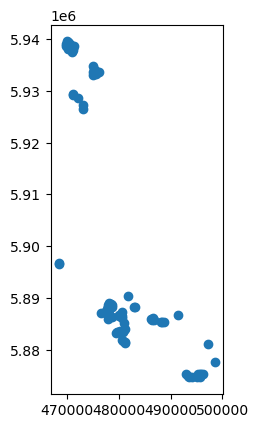

In [271]:
Windenergieanlagenstandorte_gdf.plot()
plt.show()

In [272]:

def buffer_geometries(geo_dataframes, output_paths):
    """
    Pufferoperationen für mehrere GeoDataFrames basierend auf festen Werten oder Attributfeldern.

    :param geo_dataframes: Dictionary, das GeoDataFrames und zugehörige Pufferparameter enthält
    :param output_paths: Dictionary mit Pfaden, wo die gepufferten GeoDataFrames gespeichert werden sollen
    """
    buffered_results = {}  # Dictionary zum Speichern der gepufferten Daten

    for label, config in geo_dataframes.items():
        gdf = config['gdf'].copy()
        buffer_value = config['buffer_value']
        
        # Puffern basierend auf einer festen Größe oder einem Attributfeld
        if isinstance(buffer_value, str):  # Wenn ein Attributfeld angegeben ist
            gdf['geometry'] = gdf.geometry.buffer(gdf[buffer_value] / 2)
        else:  # Fester Pufferwert
            gdf['geometry'] = gdf.geometry.buffer(buffer_value)
        
        # Ergebnis speichern
        gdf.to_file(output_paths[label])
        print(f"{label} wurde erfolgreich gepuffert und unter {output_paths[label]} gespeichert.")

        # Speichern im Dictionary
        buffered_results[label] = gdf

    return buffered_results  # Rückgabe der gepufferten GeoDataFrames

# Beispielaufruf der Funktion

# Eingabe-GeoDataFrames und Pufferparameter
geo_dataframes = {
    "Strassen": {
        "gdf": Strassen_filtered,
        "buffer_value": 0.5  # Fester Wert in Metern
    },
    "Gebaeude": {
        "gdf": GebaeudeBauwerk_gdf,
        "buffer_value": 2  # Fester Wert in Metern
    },
    "Windenergieanlagen": {
        "gdf": Windenergieanlagenstandorte_gdf,
        "buffer_value": 15 # Feldname für dynamischen Puffer
}
}

#Hier fehlen die Bäume in den Puffer Befehlen

# Ausgabepfade
output_paths = {
    "Strassen": "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/Strassen_buffered.shp",
    "Gebaeude": "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/Gebaeude_buffered.shp",
    "Windenergieanlagen": "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/Windenergieanlagen_buffered.shp",
}

# Funktion aufrufen
buffered_geometries = buffer_geometries(geo_dataframes, output_paths)

# Zugriff auf die gepufferten GeoDataFrames
Straßen_buffered = buffered_geometries["Strassen"]
Gebäude_buffered = buffered_geometries["Gebaeude"]
Windenergieanlagen_buffered = buffered_geometries["Windenergieanlagen"]

Strassen wurde erfolgreich gepuffert und unter /Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/Strassen_buffered.shp gespeichert.
Gebaeude wurde erfolgreich gepuffert und unter /Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/Gebaeude_buffered.shp gespeichert.
Windenergieanlagen wurde erfolgreich gepuffert und unter /Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Eingangsdaten/Windenergieanlagen_buffered.shp gespeichert.


/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Field Inbetriebn create as date field, though DateTime requested.
  ogr_write(


In [91]:
# Entferne leere Geometrien
Windenergieanlagen_buffered = Windenergieanlagen_buffered[~Windenergieanlagen_buffered.geometry.is_empty]
print(Windenergieanlagen_buffered.geometry.is_empty.sum())  # Sollte jetzt 0 sein
print(Windenergieanlagen_buffered.geometry.type.value_counts())
print(Windenergieanlagen_buffered)


0
Polygon    88
Name: count, dtype: int64
                       Standort            Anlagentyp Inbetriebn  Nettonennl  \
0                Industriehäfen          SENVION 3.4M 2014-06-05        3400   
1               Stahlwerke West                E82-E2 2010-05-18        2300   
2               Stahlwerke West                E82-E2 2010-05-18        2300   
3                Wurster Straße                    5M 2009-01-21        5000   
4   Ritterhuder Heerstraße/A 27                E82-E2 2015-09-29        2300   
..                          ...                   ...        ...         ...   
84               Blockland/A 27        SWT-0,6-44 MK4 1997-12-04         600   
85                   Halmer Weg  AN Bonus 600 kW/44-3 1999-03-11         600   
86                   Halmer Weg  AN Bonus 600 kW/44-3 1999-03-11         600   
87                   Halmer Weg  AN Bonus 600 kW/44-3 1999-03-11         600   
88                   Halmer Weg  AN Bonus 600 kW/44-3 1999-03-11         600  

In [273]:

def dissolve_geometries(geo_dataframes, dissolve=True):
    """
    Führt einen optionalen Dissolve auf die Geometrien mehrerer GeoDataFrames aus.

    :param geo_dataframes: Dictionary mit GeoDataFrames, die aufgelöst werden sollen
    :param dissolve: Boolean, ob der Dissolve durchgeführt werden soll (Standard: True)
    :return: Dictionary mit aufgelösten GeoDataFrames
    """
    dissolved_results = {}

    if not dissolve:
        print("Dissolve ist deaktiviert.")
        return geo_dataframes  # Gibt die ursprünglichen GeoDataFrames zurück

    for label, gdf in geo_dataframes.items():
        print(f"Führe Dissolve für {label} aus...")
        # Geometrien auflösen
        dissolved_geometry = unary_union(gdf['geometry'])
        dissolved_gdf = gpd.GeoDataFrame({'geometry': [dissolved_geometry]}, crs=gdf.crs)
        dissolved_results[label] = dissolved_gdf

        print(f"Dissolve für {label} abgeschlossen.")

    return dissolved_results

# Beispielaufruf der Funktion

#Bäume fehlen
# Eingabe-GeoDataFrames
geo_dataframes = {
    "Strassen": Straßen_buffered,
    "Gebaeude": Gebäude_buffered,
}

#"Windenergieanlagen": Windenergieanlagenstandorte_gdf
# Funktion aufrufen
dissolved_geo_dataframes = dissolve_geometries(geo_dataframes, dissolve=True)

# Zugriff auf die aufgelösten GeoDataFrames
Straßen_dissolved = dissolved_geo_dataframes["Strassen"]
Gebaeude_dissolved = dissolved_geo_dataframes["Gebaeude"]
#WEA_dissolved = dissolved_geo_dataframes["Windenergieanlagen"]

Führe Dissolve für Strassen aus...
Dissolve für Strassen abgeschlossen.
Führe Dissolve für Gebaeude aus...
Dissolve für Gebaeude abgeschlossen.


In [274]:

def merge_exclusion_areas(gdfs, output_file):
    """
    Führt mehrere GeoDataFrames zusammen und speichert das Ergebnis in einer Datei.

    :param gdfs: Liste von GeoDataFrames, die zusammengeführt werden sollen
    :param output_file: Pfad zur Ausgabedatei, in der die zusammengeführten Daten gespeichert werden
    """
    # Zusammenführen der GeoDataFrames
    merged_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

    # Zusammengeführte Geometrien speichern
    merged_gdf.to_file(output_file)
    
    print(f"Zusammengeführte Daten wurden erfolgreich unter {output_file} gespeichert.")

    return merged_gdf  # Rückgabe des zusammengeführten GeoDataFrames

# Beispielaufruf der Funktion

# Eingabe-GeoDataFrames
gdfs = [
    FFH_gdf,
    VSG_gdf,
    WSG_gdf,
    NSG_gdf,
    LSG_gdf,
    Wasserkörper_filtered,
    WeitereStrukturen_filtered,
    Straßen_dissolved,
    Gebaeude_dissolved,
    Windenergieanlagen_buffered,
]

# Pfad zur Ausgabedatei
Ausschlussflächen_merged_file = "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Berechnungsschritte/Ausschlussflächen_merged_file.GeoJSON"

# Funktion aufrufen
Ausschlussflächen_merged = merge_exclusion_areas(gdfs, Ausschlussflächen_merged_file)


Zusammengeführte Daten wurden erfolgreich unter /Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Berechnungsschritte/Ausschlussflächen_merged_file.GeoJSON gespeichert.


In [275]:
print(Ausschlussflächen_merged)
print(Ausschlussflächen_merged.geometry.type.value_counts())

                   Gebietsnam Schutzgebi  Flaechengr   Gebietsnum Erfassungs  \
0                Untere Wümme        FFH       445.0  DE 2819-301     1:5000   
1                Kuhgrabensee        FFH        31.5  DE 2819-302     1:5000   
2     Krietes Wald (Im Holze)        FFH         5.8  DE 2919-370     1:5000   
3        Parks in Oberneuland        FFH        27.0  DE 2919-371     1:5000   
4        Grambker Feldmarksee        FFH        22.6  DE 2818-301     1:5000   
...                       ...        ...         ...          ...        ...   
8945                      NaN        NaN         NaN          NaN        NaN   
8946                      NaN        NaN         NaN          NaN        NaN   
8947                      NaN        NaN         NaN          NaN        NaN   
8948                      NaN        NaN         NaN          NaN        NaN   
8949                      NaN        NaN         NaN          NaN        NaN   

                                       

In [282]:
# Reparatur der Geometrien

def fix_geometry(geom):
    if geom is None or geom.is_empty:
        return None  # Behandelt leere Geometrien
    if not geom.is_valid:
        return make_valid(geom)  # Repariert ungültige Geometrien
    return geom  # Gültige Geometrien unverändert zurückgeben

Ausschlussflächen_merged['geometry'] = Ausschlussflächen_merged['geometry'].apply(fix_geometry)

In [283]:
# Ausschlussflächen auf das Zielgebiet beschränken (Intersection)
Ausschlussflächen_merged = gpd.overlay(Ausschlussflächen_merged, Zielgebiet_gdf, how="intersection")


In [36]:
Ausschlussflächen_merged["geometry"] = Ausschlussflächen_merged.geometry.buffer(0)

In [284]:
# Filter: Nur Ausschlussflächen, die sich innerhalb des Zielgebiets befinden

Ausschlussflächen_merged = Ausschlussflächen_merged[Ausschlussflächen_merged.geometry.intersects(Zielgebiet_gdf.geometry.union_all())]



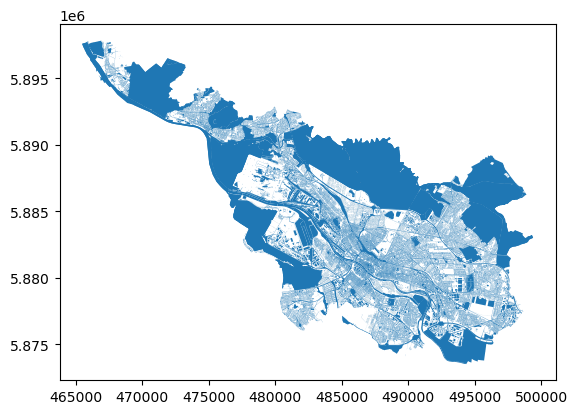

In [285]:
Ausschlussflächen_merged.plot()
plt.show()

In [286]:
Ausschlussflächen_merged = Ausschlussflächen_merged.to_crs(Zielgebiet_gdf.crs)
print(Ausschlussflächen_merged.crs)

EPSG:25832


In [287]:
if Zielgebiet_gdf.crs is None:
    print("WARNUNG: Das CRS des Zielgebiets ist nicht gesetzt!")
if Ausschlussflächen_merged.crs is None:
    print("WARNUNG: Das CRS der Ausschlussflächen ist nicht gesetzt!")


In [288]:
Ausschlussflächen_merged = Ausschlussflächen_merged.to_crs(epsg=25832)


In [290]:
print("Ungültige Geometrien in Zielgebiet_gdf:", Zielgebiet_gdf[~Zielgebiet_gdf.is_valid])
print("Ungültige Geometrien in Ausschlussflächen_merged:", Ausschlussflächen_merged[~Ausschlussflächen_merged.is_valid])


Ungültige Geometrien in Zielgebiet_gdf: Empty GeoDataFrame
Columns: [Shape_Leng, Shape_Area, geometry]
Index: []
Ungültige Geometrien in Ausschlussflächen_merged: Empty GeoDataFrame
Columns: [Gebietsnam, Schutzgebi, Flaechengr, Gebietsnum, Erfassungs, Ansprechpa, Schutzge_1, SHAPE_Leng, Shape_Le_1, Shape_Area_1, Buffer, Schutzzone, Lage, ID, WASSERWERK, BETREIBER, WSG, BEHOERDE, BEMERKUNG, Abgrenzung, Behörde, Shape_Leng_1, InKraft, Rechtsgrun, Aktenzeich, LINK, OID_1, AKTUALIT, NUTZART, BEZ, NAME, FLSTKENNZ, Standort, Anlagentyp, Inbetriebn, Nettonennl, Rotordurch, Stadt, Nabenhöhe, Radius, Shape_Leng_2, Shape_Area_2, geometry]
Index: []

[0 rows x 43 columns]


In [291]:
print("Anzahl der Geometrien in Zielgebiet:", len(Zielgebiet_gdf))
print("Anzahl der Geometrien in Ausschlussflächen:", len(Ausschlussflächen_merged))


Anzahl der Geometrien in Zielgebiet: 1
Anzahl der Geometrien in Ausschlussflächen: 8853


In [300]:
def calculate_geothermal_potential(target_gdf, exclusion_gdf, output_file):
    """
    Berechnet die Geothermie-Potenzialflächen durch Subtraktion der Ausschlussflächen vom Zielgebiet.

    :param target_gdf: GeoDataFrame mit den Zielgebietsflächen
    :param exclusion_gdf: GeoDataFrame mit den Ausschlussflächen
    :param output_file: Pfad zur Ausgabedatei, in der die berechneten Potenzialflächen gespeichert werden
    :return: Der resultierende GeoDataFrame mit den Potenzialflächen
    """

    # Geometrien zusammenführen (Falls mehrere Polygone vorhanden sind)
    target_union = target_gdf.geometry.union_all()
    exclusion_union = exclusion_gdf.geometry.union_all()

    # Unterschied berechnen (Potenzialflächen = Zielgebiet - Ausschlussflächen)
    result_geometry = target_union.difference(exclusion_union)

    # Neues GeoDataFrame mit der berechneten Fläche
    result_gdf = gpd.GeoDataFrame(geometry=[result_geometry], crs=target_gdf.crs)

    # Ergebnisse speichern
    result_gdf.to_file(output_file, driver="GeoJSON")

    print(f"✅ Geothermie-Potenzialflächen wurden erfolgreich unter {output_file} gespeichert.")

    return result_gdf  # Ergebnis zurückgeben

# Beispielaufruf der Funktion
Geothermie_Potenzialflächen_file = "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Ergebnisse/Geothermie_Potenzialflächen_file.GeoJSON"

Geothermie_Potenzialfläche = calculate_geothermal_potential(Zielgebiet_gdf, Ausschlussflächen_merged, Geothermie_Potenzialflächen_file)


✅ Geothermie-Potenzialflächen wurden erfolgreich unter /Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Ergebnisse/Geothermie_Potenzialflächen_file.GeoJSON gespeichert.


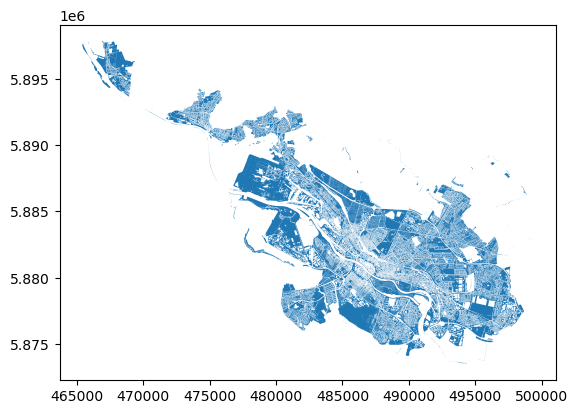

In [301]:
Geothermie_Potenzialfläche.plot()
plt.show()

In [302]:
def convert_to_singlepart(input_gdf, output_file):
    """
    Wandelt Multipart-Geometrien in Singlepart-Geometrien um und speichert das Ergebnis.

    :param input_gdf: GeoDataFrame mit Multipart-Geometrien
    :param output_file: Pfad zur Ausgabedatei, in der die Singlepart-Geometrien gespeichert werden
    """
    # Multipart in Singlepart umwandeln
    singlepart_gdf = input_gdf.explode(index_parts=False)

    # Ergebnisse speichern
    singlepart_gdf.to_file(output_file)

    return singlepart_gdf  # WICHTIG: Das Ergebnis zurückgeben!

# Beispielaufruf der Funktion

# Pfad zur Ausgabedatei
Geothermie_Potenzialflächen_SP_file = "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Berechnungsschritte/Geothermie_Potenzialflächen_SP_file.GeoJSON"

# Funktion aufrufen
Geothermie_Potenzialfläche_SP = convert_to_singlepart(Geothermie_Potenzialfläche, Geothermie_Potenzialflächen_SP_file)

print(Geothermie_Potenzialfläche_SP.geometry.type.value_counts())

Polygon    11411
Name: count, dtype: int64


In [303]:
print(Geothermie_Potenzialfläche_SP)

                                             geometry
0   POLYGON ((467026.929 5897752.885, 467037.606 5...
0   POLYGON ((467379.852 5897723.126, 467375.185 5...
0   POLYGON ((467693.174 5897765.74, 467687.936 58...
0   POLYGON ((472664.732 5896239.871, 472668.209 5...
0   POLYGON ((472764.373 5896189.974, 472783.519 5...
..                                                ...
0   POLYGON ((497413.713 5879958.875, 497416.863 5...
0   POLYGON ((497397.756 5879985.628, 497397.727 5...
0   POLYGON ((497482.598 5880242.734, 497482.668 5...
0   POLYGON ((497521.003 5880177.584, 497520.723 5...
0   POLYGON ((497070.164 5880610.181, 497070.307 5...

[11411 rows x 1 columns]


In [304]:
def filter_by_min_area(input_gdf, output_file, min_area):
    """
    Filtert Flächen basierend auf einer Mindestgröße und speichert die gefilterten Geometrien.

    :param input_gdf: GeoDataFrame mit den Flächen, die gefiltert werden sollen
    :param output_file: Pfad zur Ausgabedatei, in der die gefilterten Geometrien gespeichert werden
    :param min_area: Mindestgröße der Flächen in Quadratmetern
    """
    # Filter: Nur Flächen größer als die angegebene Mindestgröße
    filtered_gdf = input_gdf[input_gdf.geometry.area > min_area]

    # Gefilterte Geometrien speichern
    filtered_gdf.to_file(output_file)

    print(f"Gefilterte Potenzialflächen (Fläche > {min_area} m²) wurden erfolgreich unter {output_file} gespeichert.")

    return filtered_gdf  # 🔥 WICHTIG: Ergebnis zurückgeben!

# Beispielaufruf der Funktion

# Eingabe-GeoDataFrame


# Pfad zur Ausgabedatei
Geothermie_Potenzialflächen_Area_filtered_file = "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Berechnungsschritte/Geothermie_Potenzialflächen_Area_filtered_file.GeoJSON"

# Dynamisch anpassbarer Mindestgrößenwert
min_area = 10

# Funktion aufrufen
Geothermie_Potenzialfläche_Area_filtered = filter_by_min_area(Geothermie_Potenzialfläche_SP, Geothermie_Potenzialflächen_Area_filtered_file, min_area)

Gefilterte Potenzialflächen (Fläche > 10 m²) wurden erfolgreich unter /Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Berechnungsschritte/Geothermie_Potenzialflächen_Area_filtered_file.GeoJSON gespeichert.


In [305]:
def dissolve_geometries(input_gdf, output_file):
    """
    Löst die Geometrien eines GeoDataFrame auf (Dissolve) und speichert das Ergebnis.

    :param input_gdf: GeoDataFrame, dessen Geometrien aufgelöst werden sollen
    :param output_file: Pfad zur Ausgabedatei, in der die aufgelöste Geometrie gespeichert wird
    """
    # Geometrien auflösen (Dissolve)
    dissolved_geometry = unary_union(input_gdf['geometry'])

    # Neues GeoDataFrame mit der aufgelösten Geometrie
    dissolved_gdf = gpd.GeoDataFrame({'geometry': [dissolved_geometry]}, crs=input_gdf.crs)

    # Ergebnisse speichern
    dissolved_gdf.to_file(output_file)

    print(f"Die Potenzialflächen wurden erfolgreich aufgelöst und unter {output_file} gespeichert.")

    return dissolved_gdf

# Beispielaufruf der Funktion

# Eingabe-GeoDataFrame


# Pfad zur Ausgabedatei
Geothermie_Potenzialflächen_final_file = "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Ergebnisse/Geothermie_Potenzialflächen_final_file.shp"

# Funktion aufrufen
Geothermie_Potenzialfläche_final = dissolve_geometries(Geothermie_Potenzialfläche_Area_filtered, Geothermie_Potenzialflächen_final_file)


Die Potenzialflächen wurden erfolgreich aufgelöst und unter /Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Ergebnisse/Geothermie_Potenzialflächen_final_file.shp gespeichert.


In [306]:
def calculate_area_and_save(input_gdf, output_file):
    """
    Berechnet die Fläche der Geometrien in Quadratmetern und speichert das Ergebnis.

    :param input_gdf: GeoDataFrame, dessen Flächen berechnet werden sollen
    :param output_file: Pfad zur Ausgabedatei, in der das Ergebnis gespeichert wird
    """
    # Fläche in Quadratmetern berechnen
    input_gdf['area_m2'] = input_gdf.geometry.area  # Fläche wird in den Einheiten des CRS berechnet

    # Ergebnisse speichern
    input_gdf.to_file(output_file)

    print(f"Die Flächen in Quadratmetern wurden erfolgreich berechnet und unter {output_file} gespeichert.")

    return input_gdf

# Beispielaufruf der Funktion

# Eingabe-GeoDataFrame


# Pfad zur Ausgabedatei
Geothermie_Potenzialflächen_final_area_file = "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Ergebnisse/Geothermie_Potenzialflächen_final_area_file.GeoJSON"

# Funktion aufrufen
Geothermie_Potenzialfläche_final_area = calculate_area_and_save(Geothermie_Potenzialfläche_final, Geothermie_Potenzialflächen_final_area_file)


Die Flächen in Quadratmetern wurden erfolgreich berechnet und unter /Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Ergebnisse/Geothermie_Potenzialflächen_final_area_file.GeoJSON gespeichert.


In [241]:
print("Gesamtgrenzen (total_bounds):", Geothermie_Potenzialfläche_final.total_bounds)
print("Typ von total_bounds:", type(Geothermie_Potenzialfläche_final.total_bounds))


Gesamtgrenzen (total_bounds): [ 465392.0931 5873501.5011  499379.4872 5897848.0375]
Typ von total_bounds: <class 'numpy.ndarray'>


In [308]:
#Erstellen von stichprobenartig gesetzten Punkten (Theoretische Bohrlochdichte)

def create_spatial_sampling_points(Geothermie_Potenzialflächen_final_file, Bohrlöcher_file, num_samples, min_distance):
    """
    Erstellt räumliche Stichprobenpunkte mit einem Mindestabstand.

    :param Geothermie_Potenzialflächen_final_file: Pfad zur Eingabedatei (Shapefile mit Polygonen)
    :param Bohrlöcher_file: Pfad zur Ausgabedatei (Shapefile mit Stichprobenpunkten)
    :param num_samples: Anzahl der zu generierenden Stichprobenpunkte
    :param min_distance: Mindestabstand zwischen den Punkten (in metrischen Einheiten)
    """

    # Liste zur Speicherung der Stichprobenpunkte
    sample_points = []

    # Generierung von Stichprobenpunkten
    while len(sample_points) < num_samples:
        # Zufällige Punkte innerhalb der Studienfläche generieren
        minx, miny, maxx, maxy = map(float, Geothermie_Potenzialfläche_final.total_bounds.tolist())

        random_point = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))

        # Prüfen, ob der Punkt innerhalb der Studienfläche liegt und den Mindestabstand einhält
        if Geothermie_Potenzialfläche_final.contains(random_point).any():

            if all(random_point.distance(existing_point) >= min_distance for existing_point in sample_points):
                sample_points.append(random_point)

    # Erstellung eines GeoDataFrame mit den Stichprobenpunkten
    Bohrlöcher = gpd.GeoDataFrame(geometry=sample_points, crs=Geothermie_Potenzialfläche_final.crs)

    # Ergebnisse speichern
    Bohrlöcher.to_file(Bohrlöcher_file)

    print(f"{num_samples} Stichprobenpunkte mit einem Mindestabstand von {min_distance} wurden erfolgreich unter {Bohrlöcher_file} gespeichert.")

# Beispielaufruf der Funktion
create_spatial_sampling_points(
    Geothermie_Potenzialflächen_final_file = "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Ergebnisse/Geothermie_Potenzialflächen_final_file.shp",
    Bohrlöcher_file= "/Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Ergebnisse/Bohrlöcher_file.shp",
    num_samples=50,  # Anzahl der Stichprobenpunkte
    min_distance=100  # Mindestabstand in Metern
)

50 Stichprobenpunkte mit einem Mindestabstand von 100 wurden erfolgreich unter /Users/hannesrottger/Desktop/Wärmelyse Geodaten/Geothermie Ergebnisse/Bohrlöcher_file.shp gespeichert.
